In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

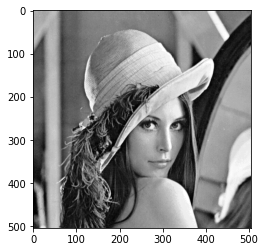

In [26]:
lena=cv2.imread('./images/lenna.png',cv2.IMREAD_GRAYSCALE)
#lena.shape
plt.imshow(lena,cmap='gray')
plt.show()

借助numpy进行傅里叶变换，并显示结果

In [27]:
fft2=np.fft.fft2(lena)
print(fft2.min())
print(fft2.max())
print(fft2.shape)

(-1238723.206073957+1743782.7941987799j)
(30482061+0j)
(504, 504)


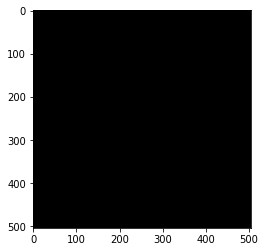

In [28]:
plt.imshow(np.abs(fft2),cmap='gray')
plt.show()

将图片变换的原点移动到频域矩形的中心，并显示效果

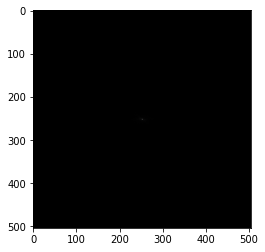

In [29]:
shift2center=np.fft.fftshift(fft2)
plt.imshow(np.abs(shift2center),cmap='gray')
plt.show()

对傅里叶变换的结果进行对数变换，并显示效果

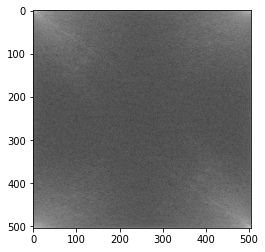

In [30]:
log_fft2=np.log(1+np.abs(fft2))
plt.imshow(np.abs(log_fft2),cmap='gray')
plt.show()

对移动了零频点的图进行对数变换

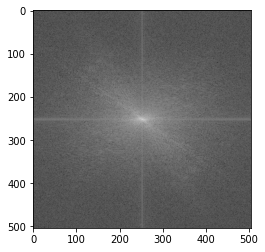

In [31]:
log_shift2center=np.log(1+np.abs(shift2center))
plt.imshow(np.abs(log_shift2center),cmap='gray')
plt.show()

----------------------------------------------------

OpenCV提供了cv2.dft()和cv2.idft()函数来实现图像傅里叶变换。 cv2.dft()返回两个通道，第一个通道将具有傅里叶变换的实部，第二个通道将具有傅里叶变换的虚部。输入图像应首先转换为np.float32。

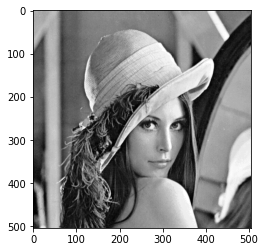

In [32]:
lena_0=cv2.imread('./images/lenna.png',0)
plt.imshow(lena_0,cmap='gray')
plt.show()

(504, 504)
lena_dft[:,:,0].min() -1238723.1
lena_dft[:,:,0].max() 30482064.0


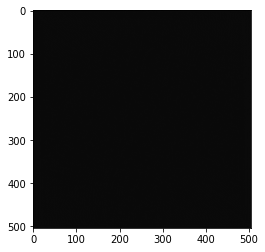

In [9]:
#实部
lena_dft=cv2.dft(np.float32(lena_0),flags=cv2.DFT_COMPLEX_OUTPUT)
print(lena_dft[:,:,0].shape)
print('lena_dft[:,:,0].min()',lena_dft[:,:,0].min())
print('lena_dft[:,:,0].max()',lena_dft[:,:,0].max())
plt.imshow(lena_dft[:,:,0],cmap='gray')
plt.show()

(504, 504)
lena_dft[:,:,1].min() -2352190.2
lena_dft[:,:,1].max() 2352190.2


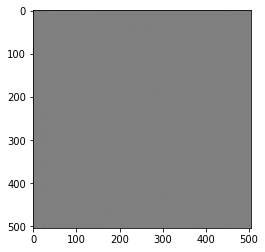

In [10]:
#虚部
lena_dft=cv2.dft(np.float32(lena_0),flags=cv2.DFT_COMPLEX_OUTPUT)
print(lena_dft[:,:,1].shape)
print('lena_dft[:,:,1].min()',lena_dft[:,:,1].min())
print('lena_dft[:,:,1].max()',lena_dft[:,:,1].max())
plt.imshow(lena_dft[:,:,1],cmap='gray')
plt.show()

(504, 504)
log_real.min() 0.022570508
log_real.max() 17.232649


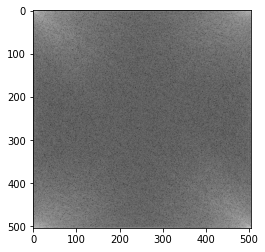

In [11]:
#实部log显示
lena_dft=cv2.dft(np.float32(lena_0),flags=cv2.DFT_COMPLEX_OUTPUT)
print(lena_dft[:,:,0].shape)
log_real=np.log(1+np.abs(lena_dft[:,:,0]))
print('log_real.min()',log_real.min())
print('log_real.max()',log_real.max())
plt.imshow(np.abs(log_real),cmap='gray')
plt.show()

(504, 504)
log_real.min() 0.0
log_real.max() 14.670858


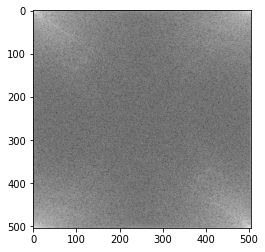

In [12]:
#虚部log显示
lena_dft=cv2.dft(np.float32(lena_0),flags=cv2.DFT_COMPLEX_OUTPUT)
print(lena_dft[:,:,1].shape)
log_imag=np.log(1+np.abs(lena_dft[:,:,1]))
print('log_real.min()',log_imag.min())
print('log_real.max()',log_imag.max())
plt.imshow(np.abs(log_imag),cmap='gray')
plt.show()

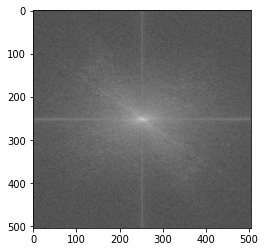

In [13]:
#先shift,然后使用cv.magnitude计算出幅值
lena_dft=cv2.dft(np.float32(lena_0),flags=cv2.DFT_COMPLEX_OUTPUT)
lena_dft_shift=np.fft.fftshift(lena_dft)
#一种归一化方法
magnitude_spactrum=20*np.log(cv2.magnitude(lena_dft_shift[:,:,0],lena_dft_shift[:,:,1]))
plt.imshow(np.abs(magnitude_spactrum),cmap='gray')
plt.show()

In [14]:
magnitude_spactrum

array([[137.68973 , 146.62793 , 139.68263 , ..., 143.98584 , 139.68263 ,
        146.62793 ],
       [139.77332 , 145.75862 , 148.89241 , ..., 142.62003 , 153.44785 ,
        147.9241  ],
       [114.94615 , 141.15701 , 132.19867 , ..., 113.69903 , 141.8018  ,
        146.0061  ],
       ...,
       [141.11905 , 158.09181 ,  98.081314, ..., 151.7724  , 144.24025 ,
        134.8193  ],
       [114.946144, 146.0061  , 141.8018  , ..., 137.22568 , 132.19867 ,
        141.15701 ],
       [139.77332 , 147.9241  , 153.44785 , ..., 156.12683 , 148.89241 ,
        145.75862 ]], dtype=float32)

In [15]:
log_shift2center

array([[6.88550967, 7.33205099, 6.98505354, ..., 7.20003568, 6.98505354,
        7.33205099],
       [6.98958806, 7.28861368, 7.44520922, ..., 7.13179912, 7.67286143,
        7.39682039],
       [5.75049364, 7.05871441, 6.61128654, ..., 5.68835371, 7.09092174,
        7.30098084],
       ...,
       [7.05681394, 7.90495842, 4.91146274, ..., 7.58912474, 7.21275045,
        6.74213791],
       [5.75049364, 7.30098084, 7.09092174, ..., 6.86232614, 6.61128654,
        7.05871441],
       [6.98958806, 7.39682039, 7.67286143, ..., 7.80675004, 7.44520922,
        7.28861368]])

In [16]:
#说明两种方法可以得到同样的结果，只是最后归一化方式不一样
magn=cv2.magnitude(lena_dft_shift[:,:,0],lena_dft_shift[:,:,1])
np.log(1+np.abs(magn))

array([[6.88551  , 7.332051 , 6.985058 , ..., 7.200039 , 6.985058 ,
        7.332051 ],
       [6.9895883, 7.2886147, 7.4452047, ..., 7.1318007, 7.6728578,
        7.396819 ],
       [5.750494 , 7.058711 , 6.61128  , ..., 5.688342 , 7.0909233,
        7.3009806],
       ...,
       [7.0568137, 7.904959 , 4.9114547, ..., 7.5891256, 7.2127495,
        6.7421465],
       [5.7504935, 7.3009806, 7.0909233, ..., 6.862331 , 6.61128  ,
        7.058711 ],
       [6.9895883, 7.396819 , 7.6728578, ..., 7.8067484, 7.4452047,
        7.2886147]], dtype=float32)

滤波，并进行逆DFT

因为频谱图的分布和频率是相关的，所以利用频谱图在几何上创建mask就可以实现对频率的滤波

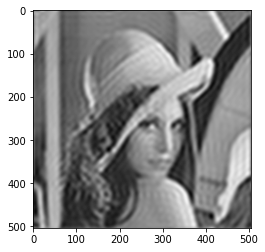

In [17]:
h,w=lena_0.shape
center_h=int(h/2)
center_w=int(w/2)
r=30
#实部和虚部都要mask
mask=np.zeros((h,w,2),np.uint8)
mask[center_h-r:center_h+r,center_w-r:center_w+r]=1
fshift=lena_dft_shift*mask
#The inverse of fftshift
f_ishift=np.fft.ifftshift(fshift)
img_back=cv2.idft(f_ishift)
#由实部和虚部求幅值
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back,cmap='gray')
plt.show()

边缘检测算子的滤波性质

https://www.cnblogs.com/ybqjymy/p/12821014.html

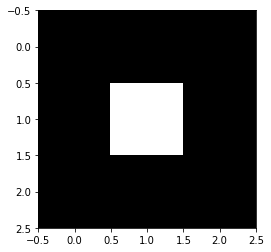

In [18]:
#mean filter，均值滤波器,低通
filter=np.ones((3,3))
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift)+1)
#plt
plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

[[ 1.   +0.j         -0.125-0.21650635j -0.125+0.21650635j]
 [-0.125-0.21650635j  0.25 -0.4330127j  -0.5  +0.j        ]
 [-0.125+0.21650635j -0.5  +0.j          0.25 +0.4330127j ]]
[[ 0.25 +0.4330127j  -0.125+0.21650635j -0.5  +0.j        ]
 [-0.125+0.21650635j  1.   +0.j         -0.125-0.21650635j]
 [-0.5  +0.j         -0.125-0.21650635j  0.25 -0.4330127j ]]


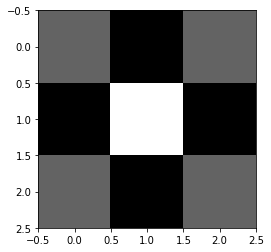

In [12]:
#laplacian filter，拉普拉斯滤波器，高通
filter=np.array([[0,1/4,0],
                [1/4,0,1/4],
                [0,1/4,0]])
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
print(fft_filter)
print(fft_filter_shift)
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift)+1)
#plt

plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

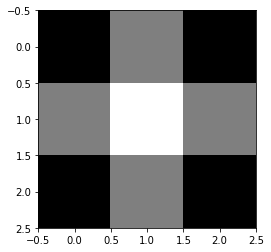

In [20]:
#gaussian filter，高斯滤波器，
#高斯核可通过opencv的函数cv2.getGaussianKernel 函数获得，但该函数只能生成一维高斯核, shape为（n, 1）
#通过矩阵乘法得到二维高斯核
x=cv2.getGaussianKernel(3,5)
filter=x*x.T
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift))
#plt
plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

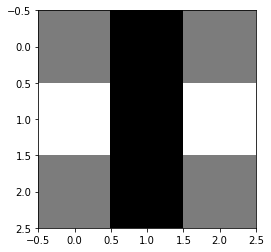

In [21]:
#sobel_x filter，索贝尔滤波器-x方向
filter=np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]])
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift)+1)
#plt
plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

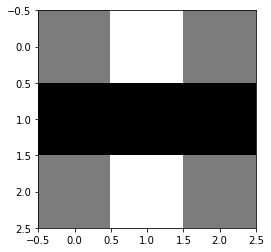

In [22]:
#sobel_y filter，索贝尔滤波器-y方向
filter=np.array([[-1,-2,-1],
                [0,0,0],
                [1,2,1]])
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift)+1)
#plt
plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

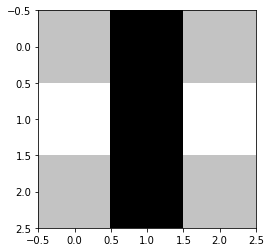

In [23]:
#scharr_x filter，索贝尔滤波器-y方向
filter=np.array([[-3,0,3],
                [-10,0,10],
                [-3,0,3]])
fft_filter=np.fft.fft2(filter)
#shift
fft_filter_shift=np.fft.fftshift(fft_filter)
#norm
fft_filter_shift_norm=np.log(np.abs(fft_filter_shift)+1)
#plt
plt.imshow(fft_filter_shift_norm,cmap='gray')
plt.show()

In [24]:
def dfn(img):
    import time
    
    #具体计算公式看ppt
    h,w=img.shape
    #生成一个复数矩阵
    F=np.zeros([h,w],'complex128')
    print('h:',h)
    for u in range(h):
        print(u)
        
        start=time.time()
        
        for v in range(w):
            res=0
            for x in range(h):
                for y in range(w):
                    res+=img[x,y]*np.exp(-1.j*2*np.pi*(u*x/h+v*y/w))
            F[u,v]=res
        end=time.time()
        print('cost time:',end-start,' seconds')
    return F

In [ ]:
dfn(lena_0)

h: 504
0


In [ ]:
lena_0.shape

In [ ]:
street=cv2.imread('./images/sample2.jpg',0)
plt.imshow(street,cmap='gray')
plt.show()

In [ ]:
dfn(street)